In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from qolmat import missing_patterns
from qolmat.diffusion_model  import ImputerDiffusion
from qolmat.model  import TabDDPM, TsDDPM
import os

ImportError: cannot import name 'missing_patterns' from 'qolmat' (/Data/.sys/envs/env0/lib/python3.9/site-packages/qolmat/__init__.py)

In [20]:

def aggregate_market_data():
    """
    Aggregates market data for all tickers within a specified period.

    Args:
        period_start (date): The start date for data aggregation.
        period_end (date): The end date for data aggregation.

    Returns:
        None: Writes the aggregated data to CSV files.
    """
    all_paths = os.listdir('data')
    all_df = []
    for ticker in tqdm(all_paths):
        try:
            mkt_data_ticker = pd.read_csv(os.path.join('data',ticker),index_col=0)
            mkt_data_ticker.columns = [ticker.replace('.csv',"")]
            all_df.append(mkt_data_ticker)
        except:
            print("failed {0}".format(ticker))
    return all_df
data = aggregate_market_data()
df = pd.concat(data,axis=1).dropna(axis=1, how='any').pct_change().dropna()
df.index = pd.to_datetime(df.index)
df = df.sort_index().loc['2015':]
df = pd.DataFrame(df.stack(),columns = ['Ret'])
df.index.names =['date','Ticker']
df_orig = df.copy()
df.loc['2021':] = np.nan
df = df.swaplevel(0, 1)
df_orig = df_orig.swaplevel(0, 1)

100%|██████████| 141/141 [00:00<00:00, 199.79it/s]


In [23]:
df = df['Ret'].unstack().T
df

Ticker          AAPL       ABT      ADBE       ADI       ADM       ADP  \
date                                                                     
2015-01-02 -0.009514 -0.002666 -0.004952  0.000360  0.000385 -0.000960   
2015-01-05 -0.028169  0.000223 -0.004976 -0.018185 -0.034604 -0.000720   
2015-01-06  0.000093 -0.011357 -0.020144 -0.023473 -0.019712 -0.008290   
2015-01-07  0.014025  0.008107  0.008223  0.010516  0.015032  0.008723   
2015-01-08  0.038419  0.020556  0.025383  0.017653 -0.014609  0.022941   
...              ...       ...       ...       ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker          ADSK       AEE       AEP       AIG  ...       CPB       CSX  \
date                                                ...                       
2015-01-02 -0.008825 -0.003036  0.007081  0.001785  ...  0.000000 -0.010481   
2015-01-05 -0.014614 -0.010002 -0.014718 -0.019784  ... -0.015227 -0.027058   
2015-01-06 -0.019775 -0.011639  0.005478 -0.014180  ... -0.006694 -0.039853   
2015-01-07 -0.002087  0.007776  0.014195  0.004795  ...  0.044147  0.013140   
2015-01-08  0.024747  0.003530  0.008627 -0.004406  ...  0.020211  0.015914   
...              ...       ...       ...       ...  ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN  ...       NaN       NaN   

Ticker          CTAS       CVX         D        DD       DDS        DE  \
date                                                                     
2015-01-02  0.000128  0.003566  0.007672 -0.000436 -0.027081 -0.001470   
2015-01-05 -0.018228 -0.039972 -0.012131 -0.030929 -0.005911 -0.021393   
2015-01-06 -0.001948 -0.000464 -0.005093 -0.016071 -0.024697 -0.008330   
2015-01-07 -0.005268 -0.000832  0.004069 -0.001609  0.039635 -0.004316   
2015-01-08  0.016544  0.022883  0.011770  0.024884  0.002850  0.013238   
...              ...       ...       ...       ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker           DIS       DOV  
date                            
2015-01-02 -0.004670  0.003624  
2015-01-05 -0.014614 -0.034871  
2015-01-06 -0.005304 -0.004750  
2015-01-07  0.010230  0.008245  
2015-01-08  0.010341  0.020369  
...              ...       ...  
2023-06-26       NaN       NaN  
2023-06-27       NaN       NaN  
2023-06-28       NaN       NaN  
2023-06-29       NaN       NaN  
2023-06-30       NaN       NaN  

[2138 rows x 53 columns]

In [24]:
start_date = df.index.min()
end_date = df.index.max()
new_index = pd.date_range(start_date, end_date, freq='B')
df_reindexed = df.reindex(new_index)
df_reindexed.index.names = ['date']
df_reindexed

Ticker          AAPL       ABT      ADBE       ADI       ADM       ADP  \
date                                                                     
2015-01-02 -0.009514 -0.002666 -0.004952  0.000360  0.000385 -0.000960   
2015-01-05 -0.028169  0.000223 -0.004976 -0.018185 -0.034604 -0.000720   
2015-01-06  0.000093 -0.011357 -0.020144 -0.023473 -0.019712 -0.008290   
2015-01-07  0.014025  0.008107  0.008223  0.010516  0.015032  0.008723   
2015-01-08  0.038419  0.020556  0.025383  0.017653 -0.014609  0.022941   
...              ...       ...       ...       ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker          ADSK       AEE       AEP       AIG  ...       CPB       CSX  \
date                                                ...                       
2015-01-02 -0.008825 -0.003036  0.007081  0.001785  ...  0.000000 -0.010481   
2015-01-05 -0.014614 -0.010002 -0.014718 -0.019784  ... -0.015227 -0.027058   
2015-01-06 -0.019775 -0.011639  0.005478 -0.014180  ... -0.006694 -0.039853   
2015-01-07 -0.002087  0.007776  0.014195  0.004795  ...  0.044147  0.013140   
2015-01-08  0.024747  0.003530  0.008627 -0.004406  ...  0.020211  0.015914   
...              ...       ...       ...       ...  ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN  ...       NaN       NaN   

Ticker          CTAS       CVX         D        DD       DDS        DE  \
date                                                                     
2015-01-02  0.000128  0.003566  0.007672 -0.000436 -0.027081 -0.001470   
2015-01-05 -0.018228 -0.039972 -0.012131 -0.030929 -0.005911 -0.021393   
2015-01-06 -0.001948 -0.000464 -0.005093 -0.016071 -0.024697 -0.008330   
2015-01-07 -0.005268 -0.000832  0.004069 -0.001609  0.039635 -0.004316   
2015-01-08  0.016544  0.022883  0.011770  0.024884  0.002850  0.013238   
...              ...       ...       ...       ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker           DIS       DOV  
date                            
2015-01-02 -0.004670  0.003624  
2015-01-05 -0.014614 -0.034871  
2015-01-06 -0.005304 -0.004750  
2015-01-07  0.010230  0.008245  
2015-01-08  0.010341  0.020369  
...              ...       ...  
2023-06-26       NaN       NaN  
2023-06-27       NaN       NaN  
2023-06-28       NaN       NaN  
2023-06-29       NaN       NaN  
2023-06-30       NaN       NaN  

[2216 rows x 53 columns]

In [25]:

tabddpm = ImputerDiffusion(
    model=TsDDPM(num_noise_steps=50,nheads_feature=8,nheads_time=8), epochs=300, batch_size=252, x_valid=df_reindexed, print_valid=True,index_datetime='date',
      freq_str = '1B',columnwise=False
)
tabddpm.fit(df_reindexed)

Ticker          AAPL       ABT      ADBE       ADI       ADM       ADP  \
date                                                                     
2015-01-02 -0.009514 -0.002666 -0.004952  0.000360  0.000385 -0.000960   
2015-01-05 -0.028169  0.000223 -0.004976 -0.018185 -0.034604 -0.000720   
2015-01-06  0.000093 -0.011357 -0.020144 -0.023473 -0.019712 -0.008290   
2015-01-07  0.014025  0.008107  0.008223  0.010516  0.015032  0.008723   
2015-01-08  0.038419  0.020556  0.025383  0.017653 -0.014609  0.022941   
...              ...       ...       ...       ...       ...       ...   
2023-06-26       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker          ADSK       AEE       

ImputerDiffusion(batch_size=252, epochs=300, freq_str='1B',
                 index_datetime='date',
                 model=<qolmat.model.TsDDPM object at 0x000001B080BF0F10>,
                 print_valid=True,
                 x_valid=Ticker          AAPL       ABT      ADBE       ADI       ADM       ADP  \
date                                                                     
2015-01-02 -0.009514 -0.002666 -0.004952  0.000360  0.000385 -0.000960   
2015-01-05 -0.028169  0.000223 -0.004976 -0.018185 -0.034604 -0.000720   
2015-01-06  0.000093 -0.011357 -0.020144...
2023-06-27       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-28       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-29       NaN       NaN       NaN       NaN       NaN       NaN   
2023-06-30       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker           DIS       DOV  
date                            
2015-01-02 -0.004670  0.003624  
2015-01-05 -0.014614 -0.034871  
2015-01-06 -0.005304 -0.004750  
2015-01-07  0.010230  0.008245  
2015-01-08  0.010341  0.020369  
...              ...       ...  
2023-06-26       NaN       NaN  
2023-06-27       NaN       NaN  
2023-06-28       NaN       NaN  
2023-06-29       NaN       NaN  
2023-06-30       NaN       NaN  

[2216 rows x 53 columns])

Text(0.5, 0, 'epochs')

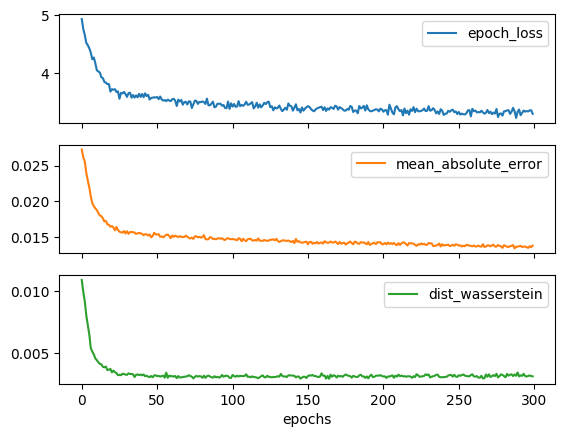

In [26]:
pd.DataFrame(tabddpm.model.summary).plot(subplots=True)
plt.xlabel('epochs')

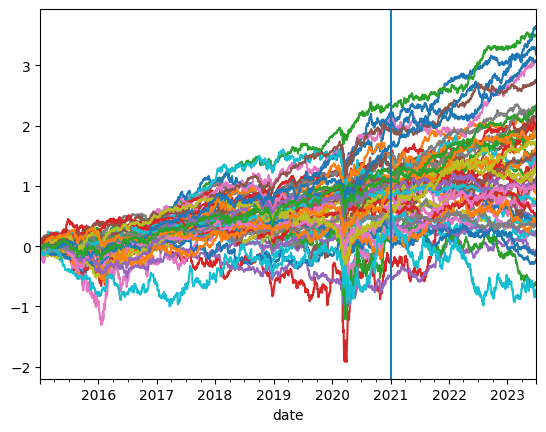

In [27]:
df_imputed = tabddpm.transform(df_reindexed)
df_imputed.cumsum().plot(legend=False)
plt.axvline('2021-01-04')

In [41]:
df_imputed

Ticker          AAPL       ABT      ADBE       ADI       ADM       ADP  \
date                                                                     
2015-01-02 -0.009514 -0.002666 -0.004952  0.000360  0.000385 -0.000960   
2015-01-05 -0.028169  0.000223 -0.004976 -0.018185 -0.034604 -0.000720   
2015-01-06  0.000093 -0.011357 -0.020144 -0.023473 -0.019712 -0.008290   
2015-01-07  0.014025  0.008107  0.008223  0.010516  0.015032  0.008723   
2015-01-08  0.038419  0.020556  0.025383  0.017653 -0.014609  0.022941   
...              ...       ...       ...       ...       ...       ...   
2023-06-26 -0.003406 -0.008952 -0.006537  0.016868 -0.009770 -0.019870   
2023-06-27 -0.036923  0.010546 -0.001264 -0.002362 -0.008645 -0.009419   
2023-06-28 -0.031302 -0.009711 -0.013613  0.005691 -0.008861 -0.020422   
2023-06-29 -0.042246  0.014828  0.002143 -0.006678 -0.001111 -0.017866   
2023-06-30  0.003522  0.008577  0.003127  0.009822 -0.008459 -0.002062   

Ticker          ADSK       AEE       AEP       AIG  ...       CPB       CSX  \
date                                                ...                       
2015-01-02 -0.008825 -0.003036  0.007081  0.001785  ...  0.000000 -0.010481   
2015-01-05 -0.014614 -0.010002 -0.014718 -0.019784  ... -0.015227 -0.027058   
2015-01-06 -0.019775 -0.011639  0.005478 -0.014180  ... -0.006694 -0.039853   
2015-01-07 -0.002087  0.007776  0.014195  0.004795  ...  0.044147  0.013140   
2015-01-08  0.024747  0.003530  0.008627 -0.004406  ...  0.020211  0.015914   
...              ...       ...       ...       ...  ...       ...       ...   
2023-06-26  0.015184  0.013772  0.012012  0.011285  ... -0.012466  0.031528   
2023-06-27 -0.007751 -0.016784 -0.020219 -0.018612  ...  0.001828  0.004348   
2023-06-28 -0.005226 -0.011136 -0.008218  0.021654  ...  0.019898  0.010606   
2023-06-29 -0.005296 -0.002290 -0.015399 -0.027522  ... -0.012297  0.022847   
2023-06-30  0.003908  0.004546 -0.009184  0.013828  ...  0.003699  0.005338   

Ticker          CTAS       CVX         D        DD       DDS        DE  \
date                                                                     
2015-01-02  0.000128  0.003566  0.007672 -0.000436 -0.027081 -0.001470   
2015-01-05 -0.018228 -0.039972 -0.012131 -0.030929 -0.005911 -0.021393   
2015-01-06 -0.001948 -0.000464 -0.005093 -0.016071 -0.024697 -0.008330   
2015-01-07 -0.005268 -0.000832  0.004069 -0.001609  0.039635 -0.004316   
2015-01-08  0.016544  0.022883  0.011770  0.024884  0.002850  0.013238   
...              ...       ...       ...       ...       ...       ...   
2023-06-26  0.006674 -0.002352  0.023021  0.018816  0.017549 -0.009352   
2023-06-27  0.006738 -0.006629 -0.012200  0.015268 -0.020840 -0.009678   
2023-06-28 -0.007725  0.014358 -0.005784 -0.001585  0.034813  0.015322   
2023-06-29 -0.000747 -0.020775 -0.006505  0.035994 -0.035148  0.005492   
2023-06-30 -0.011929  0.000227 -0.004123  0.003378  0.040873 -0.006260   

Ticker           DIS       DOV  
date                            
2015-01-02 -0.004670  0.003624  
2015-01-05 -0.014614 -0.034871  
2015-01-06 -0.005304 -0.004750  
2015-01-07  0.010230  0.008245  
2015-01-08  0.010341  0.020369  
...              ...       ...  
2023-06-26  0.011886 -0.015899  
2023-06-27 -0.006267  0.014100  
2023-06-28  0.032252 -0.012081  
2023-06-29  0.014376  0.023404  
2023-06-30 -0.008166  0.005137  

[2216 rows x 53 columns]

In [28]:
df_orig = df_orig['Ret'].unstack().T
df_orig

Ticker          AAPL       ABT      ADBE       ADI       ADM       ADP  \
date                                                                     
2015-01-02 -0.009514 -0.002666 -0.004952  0.000360  0.000385 -0.000960   
2015-01-05 -0.028169  0.000223 -0.004976 -0.018185 -0.034604 -0.000720   
2015-01-06  0.000093 -0.011357 -0.020144 -0.023473 -0.019712 -0.008290   
2015-01-07  0.014025  0.008107  0.008223  0.010516  0.015032  0.008723   
2015-01-08  0.038419  0.020556  0.025383  0.017653 -0.014609  0.022941   
...              ...       ...       ...       ...       ...       ...   
2023-06-26 -0.007553  0.004257 -0.010748  0.002152  0.010152  0.007997   
2023-06-27  0.015059 -0.006635  0.020354  0.032414  0.003394  0.000325   
2023-06-28  0.006328 -0.001670 -0.013980 -0.012891  0.000676  0.000000   
2023-06-29  0.001797  0.000465  0.002778 -0.002211  0.009198  0.003942   
2023-06-30  0.023103  0.012632  0.010790  0.028130  0.012596  0.015384   

Ticker          ADSK       AEE       AEP       AIG  ...       CPB       CSX  \
date                                                ...                       
2015-01-02 -0.008825 -0.003036  0.007081  0.001785  ...  0.000000 -0.010481   
2015-01-05 -0.014614 -0.010002 -0.014718 -0.019784  ... -0.015227 -0.027058   
2015-01-06 -0.019775 -0.011639  0.005478 -0.014180  ... -0.006694 -0.039853   
2015-01-07 -0.002087  0.007776  0.014195  0.004795  ...  0.044147  0.013140   
2015-01-08  0.024747  0.003530  0.008627 -0.004406  ...  0.020211  0.015914   
...              ...       ...       ...       ...  ...       ...       ...   
2023-06-26 -0.006040  0.014228  0.003474  0.008149  ...  0.005265  0.011302   
2023-06-27  0.030232  0.007440 -0.004058  0.014011  ...  0.008072  0.010872   
2023-06-28 -0.002659 -0.021068 -0.021813  0.000177  ... -0.019048  0.003583   
2023-06-29 -0.000582  0.001732  0.020093  0.013106  ...  0.003531  0.008336   
2023-06-30 -0.007615  0.008396  0.011290  0.005945  ...  0.005056  0.006791   

Ticker          CTAS       CVX         D        DD       DDS        DE  \
date                                                                     
2015-01-02  0.000128  0.003566  0.007672 -0.000436 -0.027081 -0.001470   
2015-01-05 -0.018228 -0.039972 -0.012131 -0.030929 -0.005911 -0.021393   
2015-01-06 -0.001948 -0.000464 -0.005093 -0.016071 -0.024697 -0.008330   
2015-01-07 -0.005268 -0.000832  0.004069 -0.001609  0.039635 -0.004316   
2015-01-08  0.016544  0.022883  0.011770  0.024884  0.002850  0.013238   
...              ...       ...       ...       ...       ...       ...   
2023-06-26  0.005761  0.017575  0.018718  0.000295 -0.009668  0.014192   
2023-06-27  0.011991 -0.003117 -0.005304  0.020649  0.041153 -0.001658   
2023-06-28 -0.003766  0.009054 -0.016187  0.006793 -0.022914 -0.010525   
2023-06-29  0.001410  0.008521  0.003096  0.017081  0.022910 -0.005743   
2023-06-30  0.014387  0.007104 -0.000579  0.008185 -0.015152  0.008864   

Ticker           DIS       DOV  
date                            
2015-01-02 -0.004670  0.003624  
2015-01-05 -0.014614 -0.034871  
2015-01-06 -0.005304 -0.004750  
2015-01-07  0.010230  0.008245  
2015-01-08  0.010341  0.020369  
...              ...       ...  
2023-06-26  0.006810  0.013958  
2023-06-27  0.004059  0.011810  
2023-06-28 -0.002583 -0.009946  
2023-06-29  0.001351  0.009068  
2023-06-30  0.003710  0.020740  

[2138 rows x 53 columns]

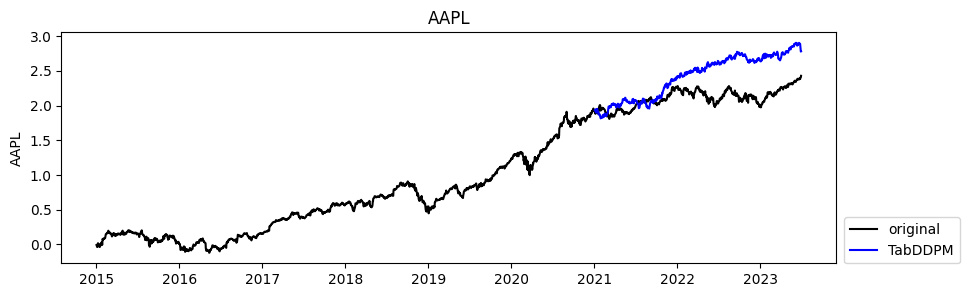

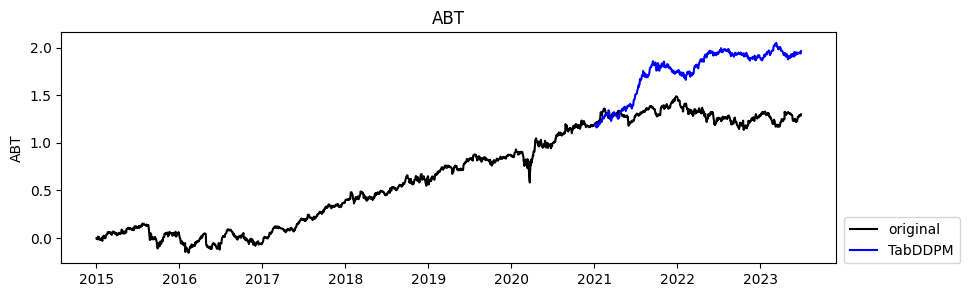

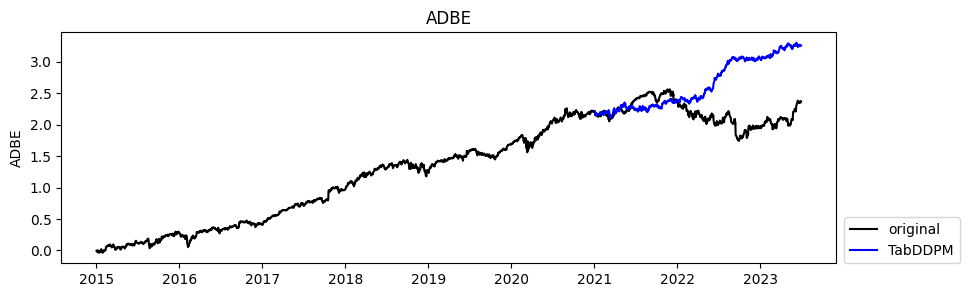

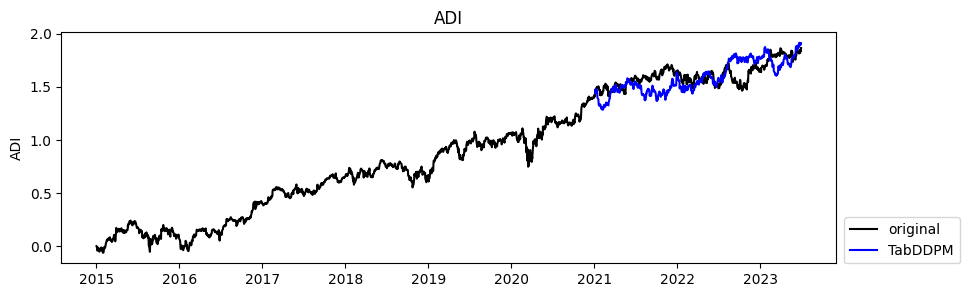

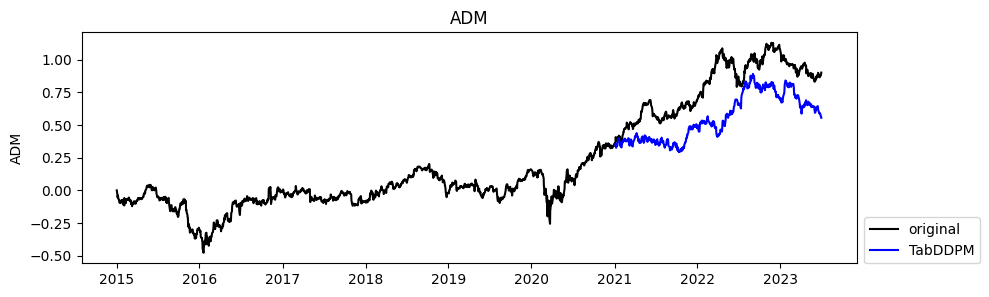

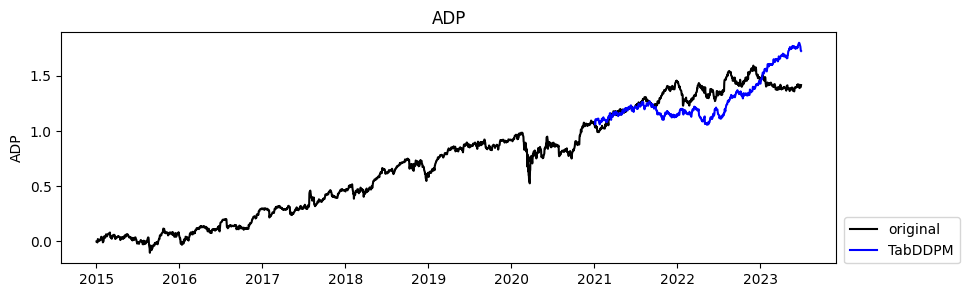

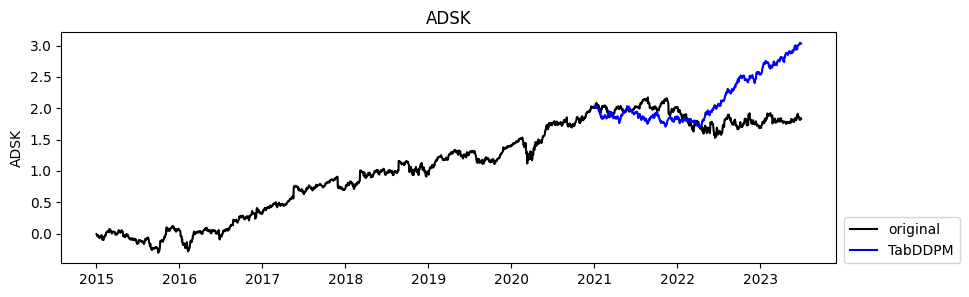

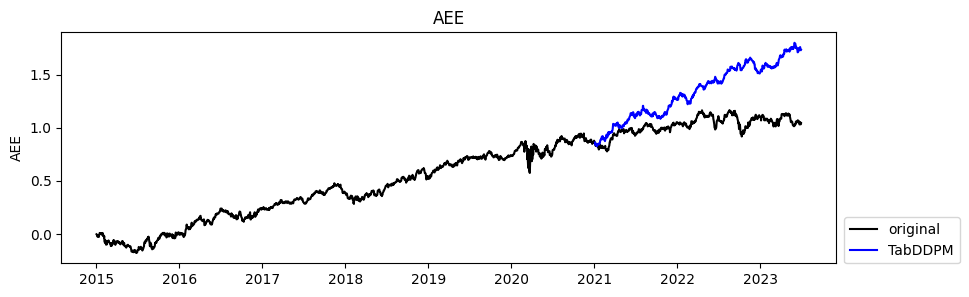

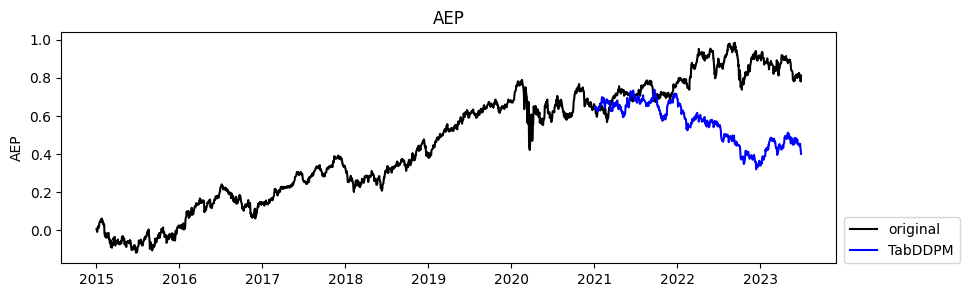

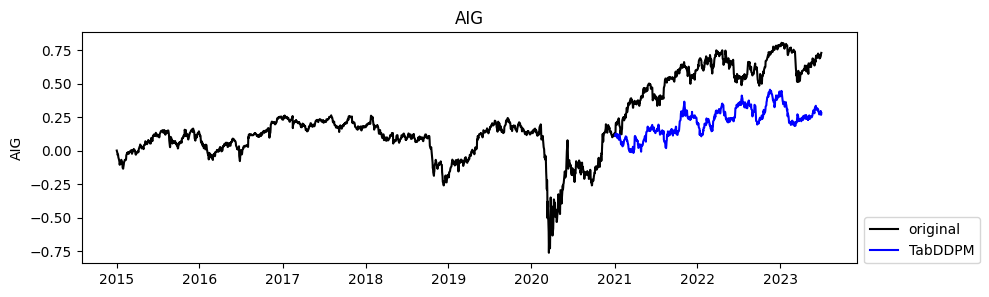

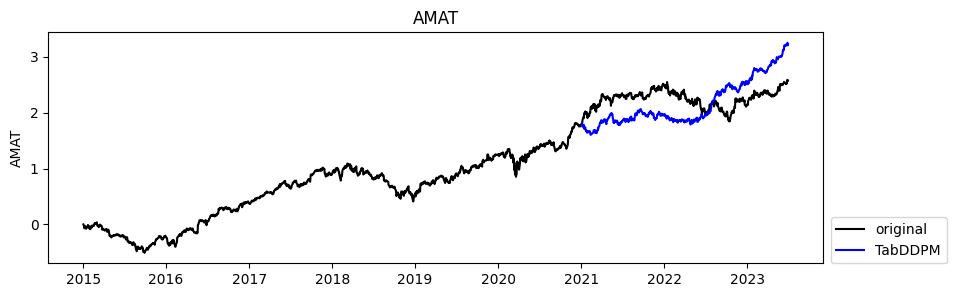

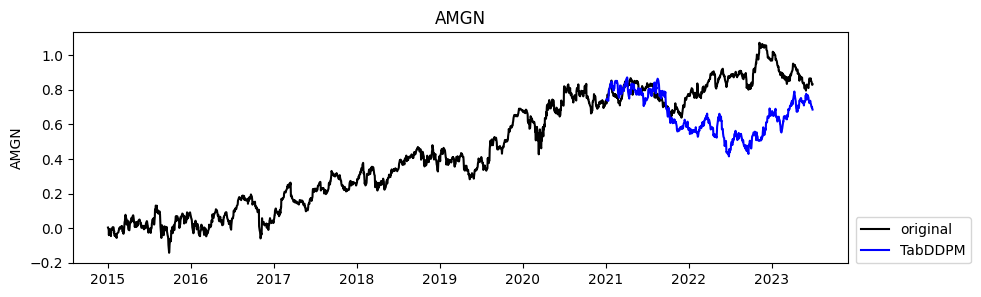

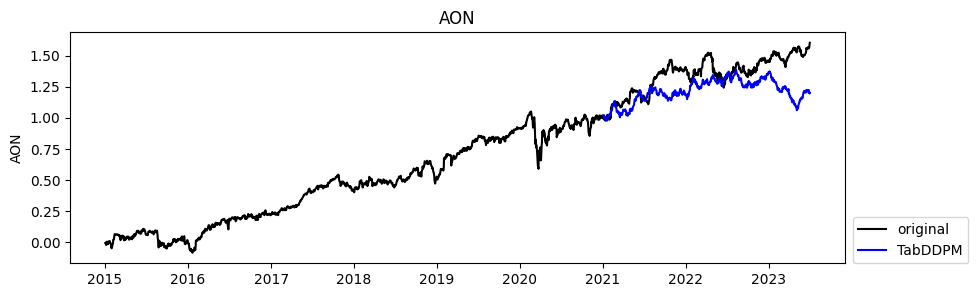

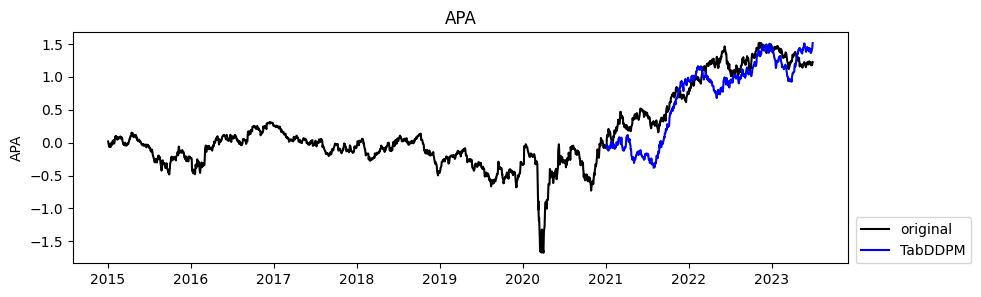

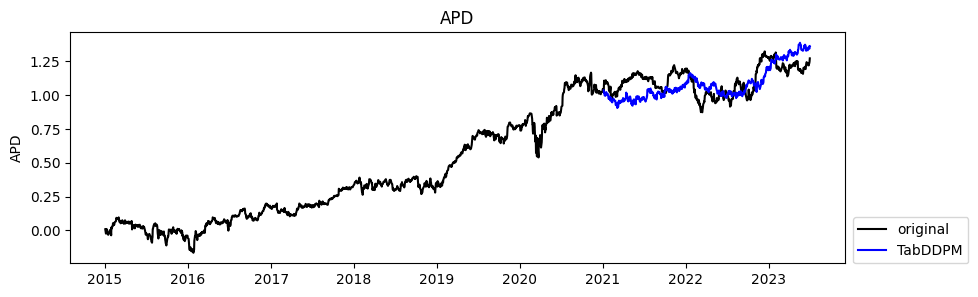

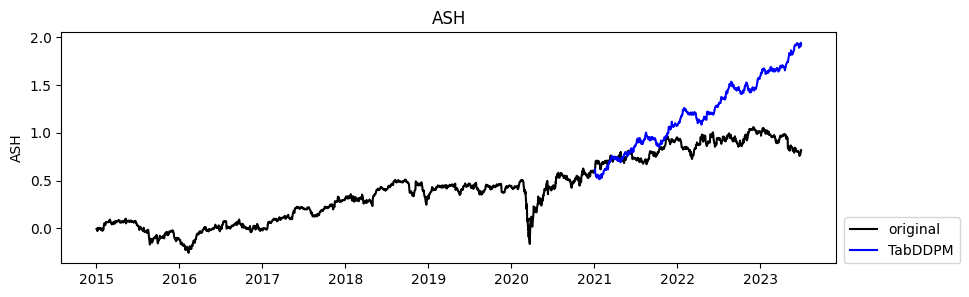

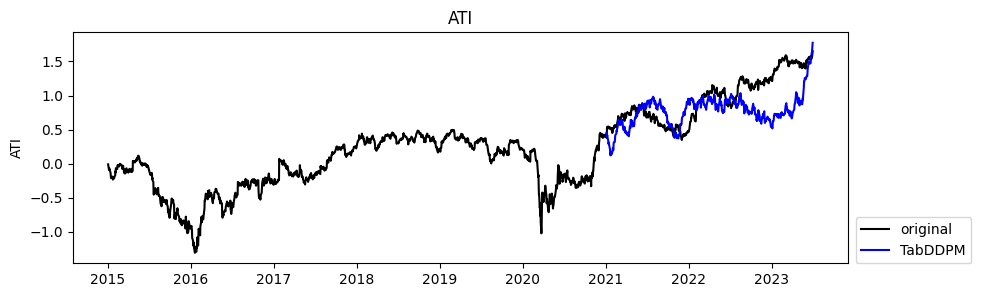

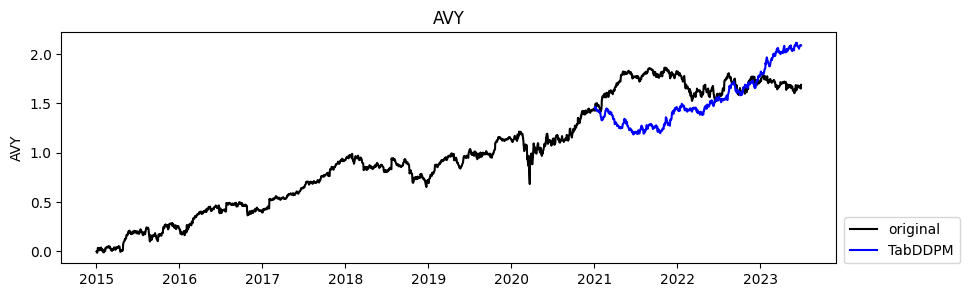

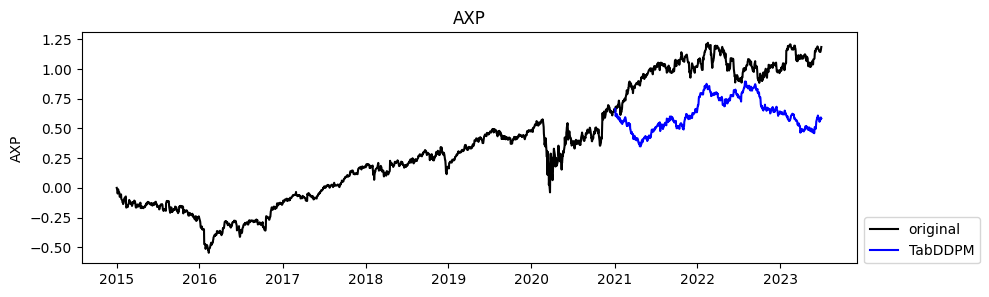

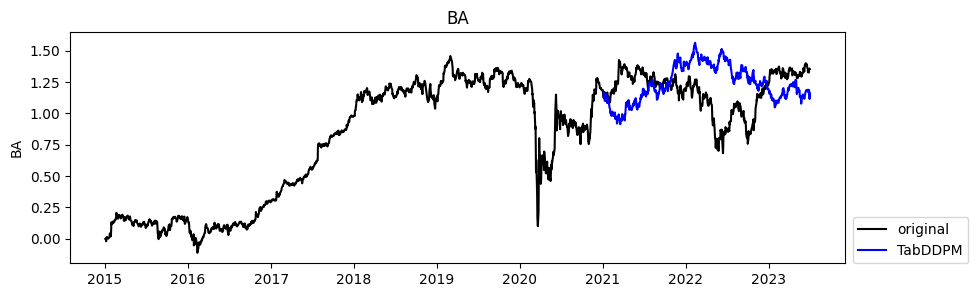

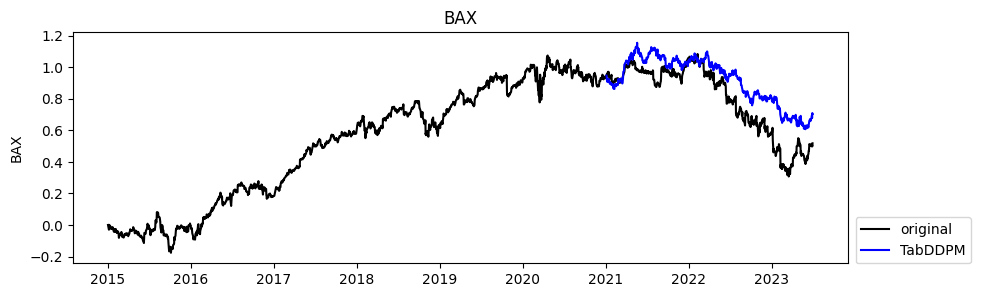

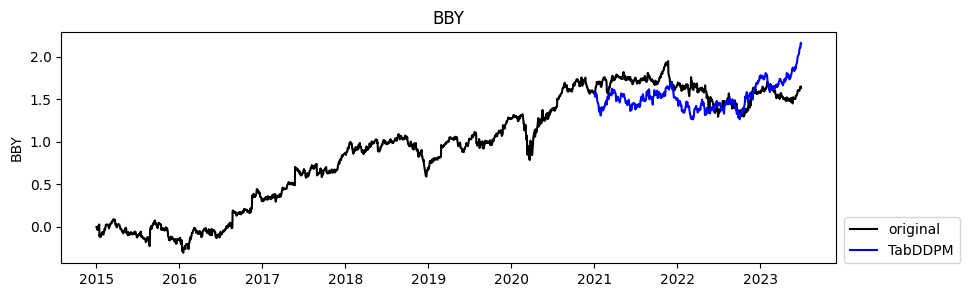

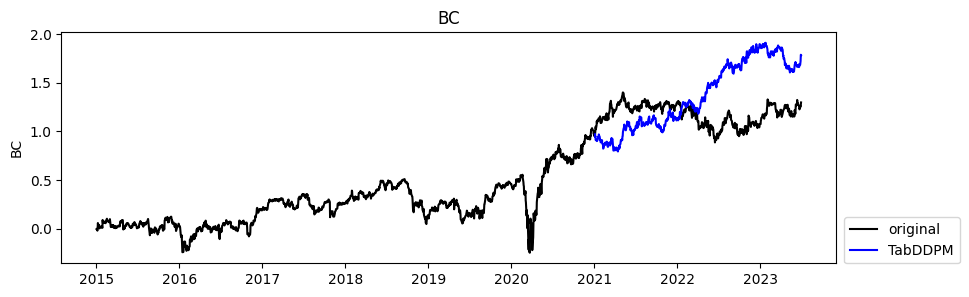

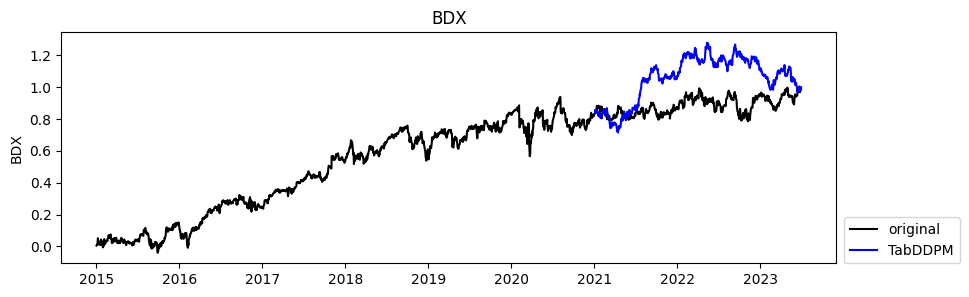

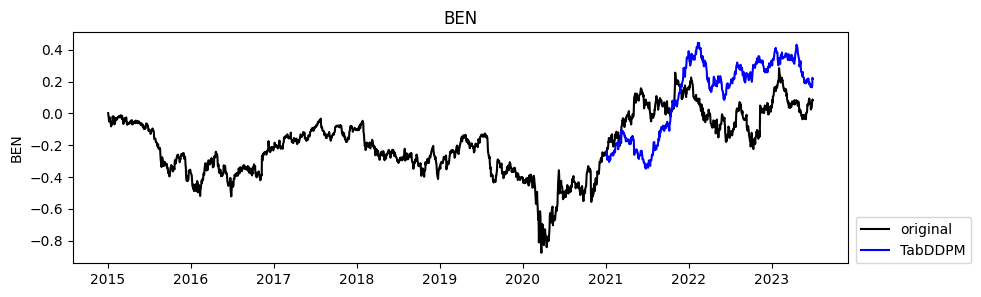

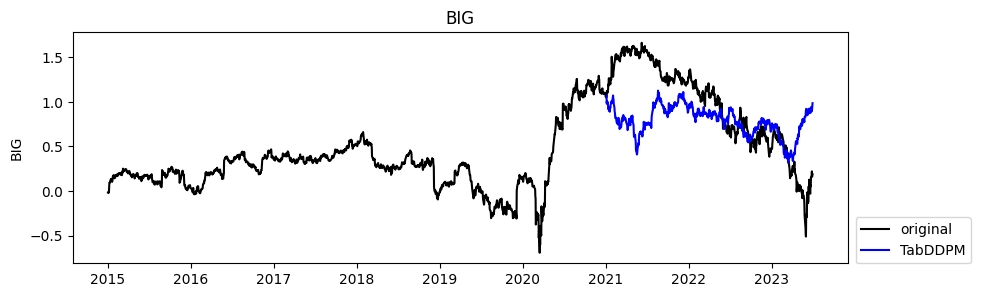

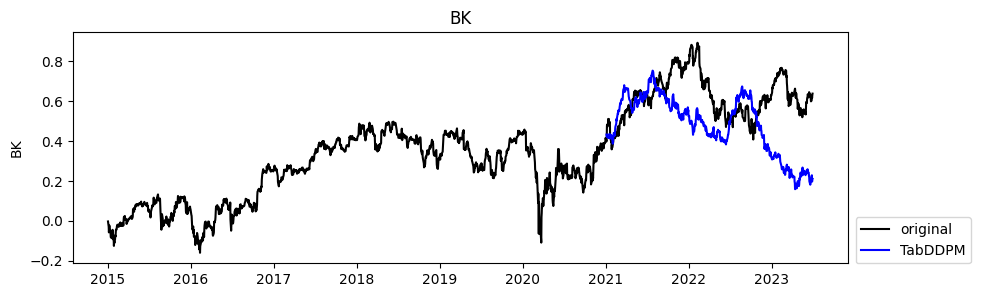

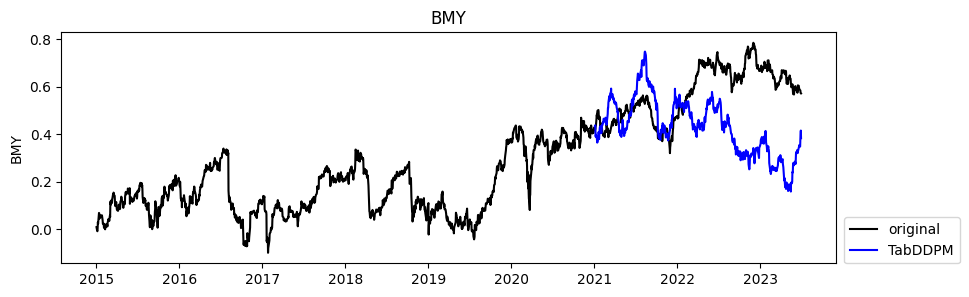

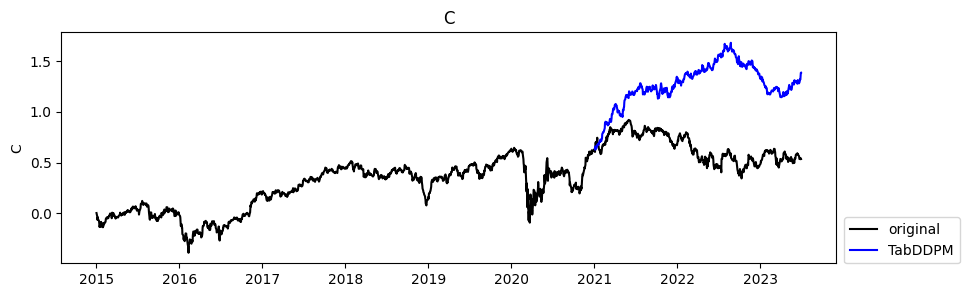

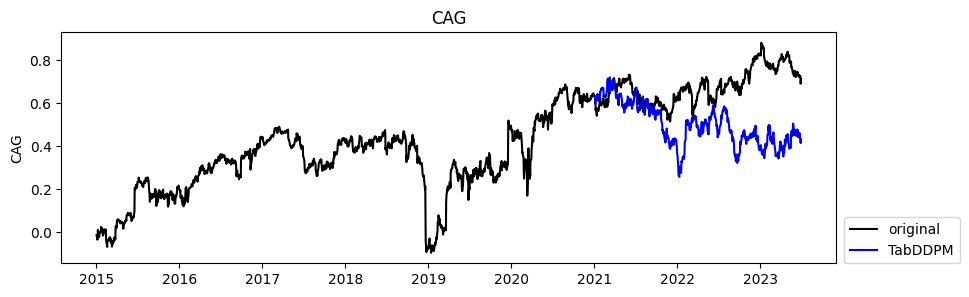

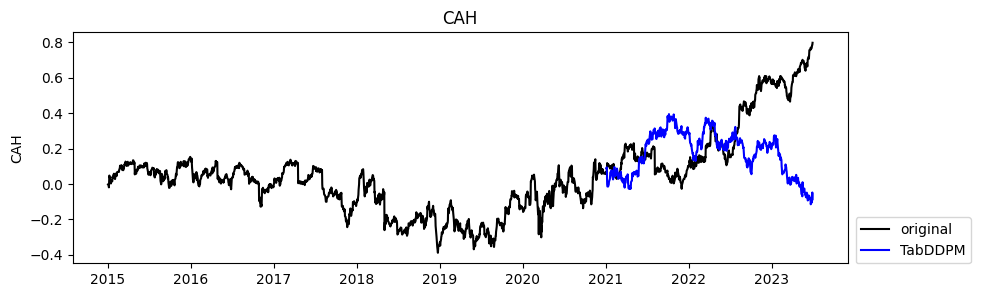

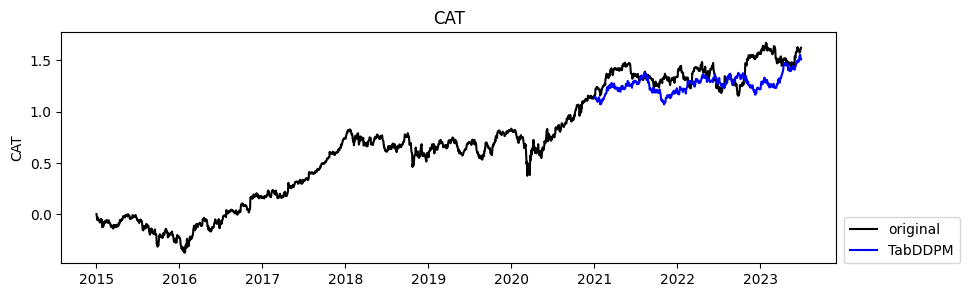

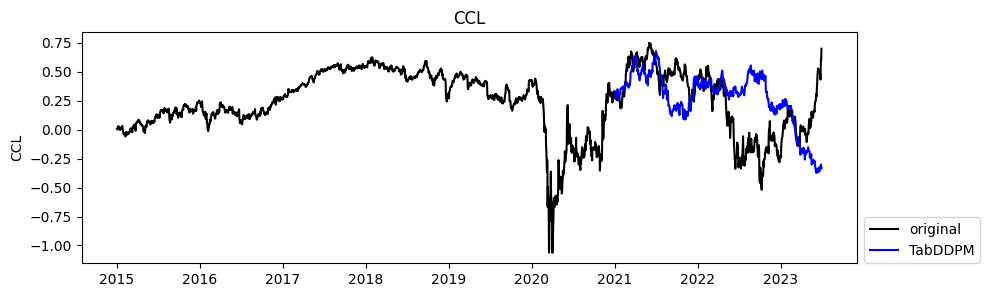

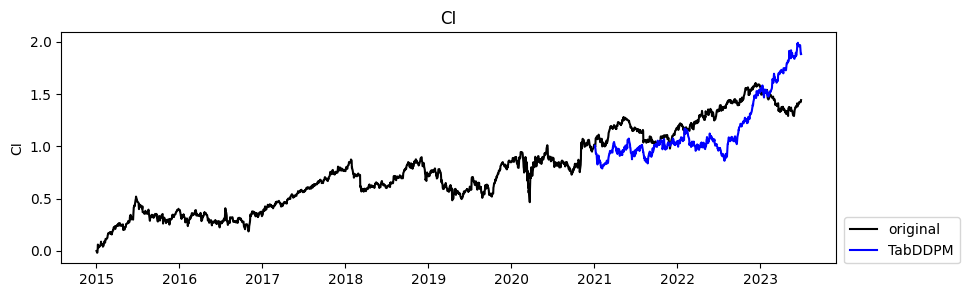

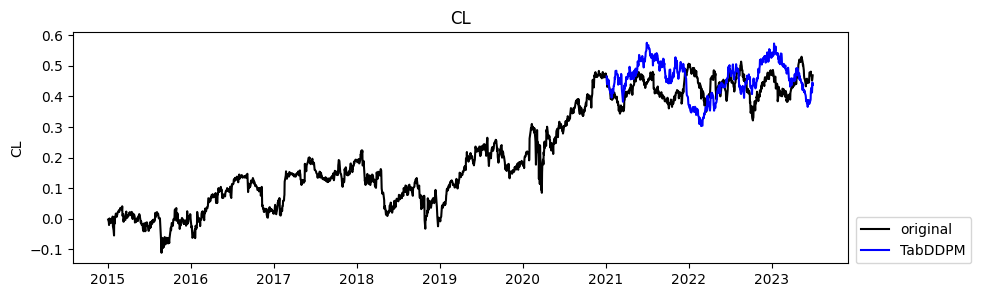

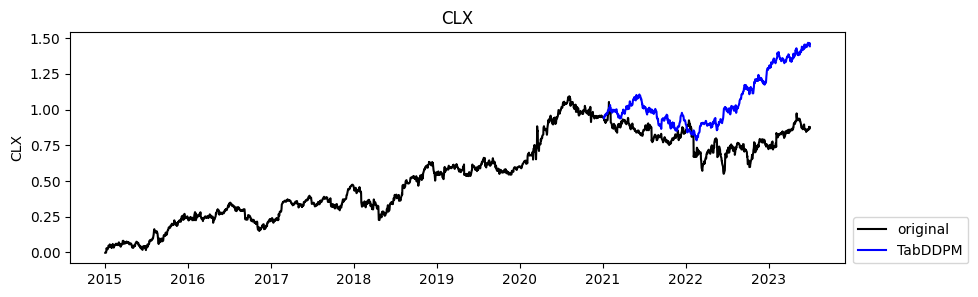

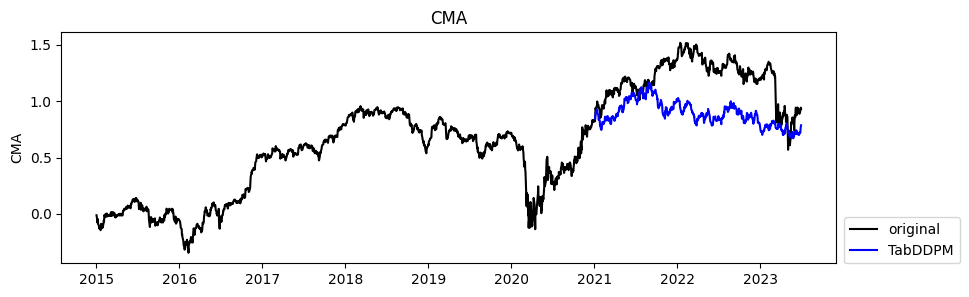

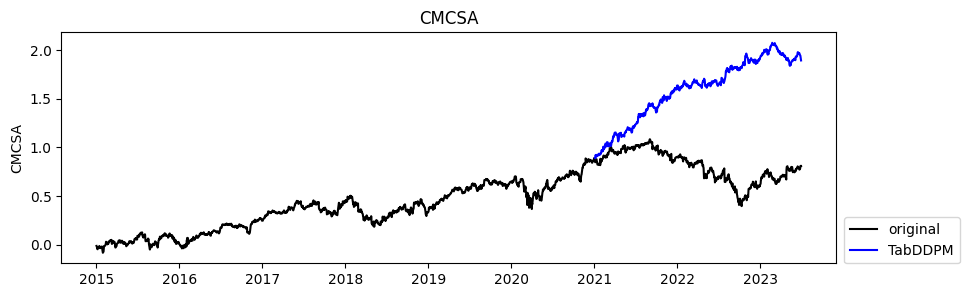

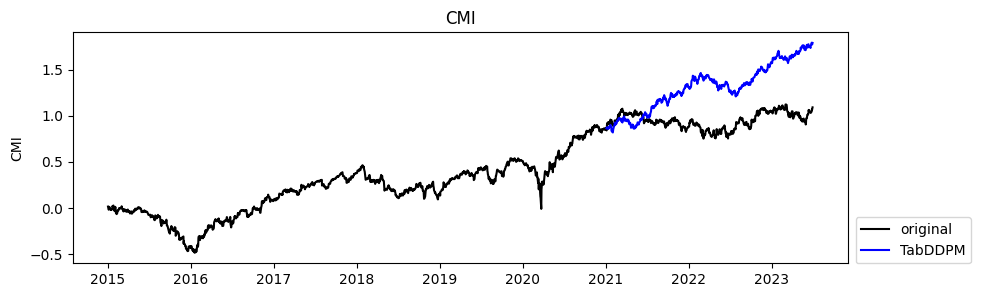

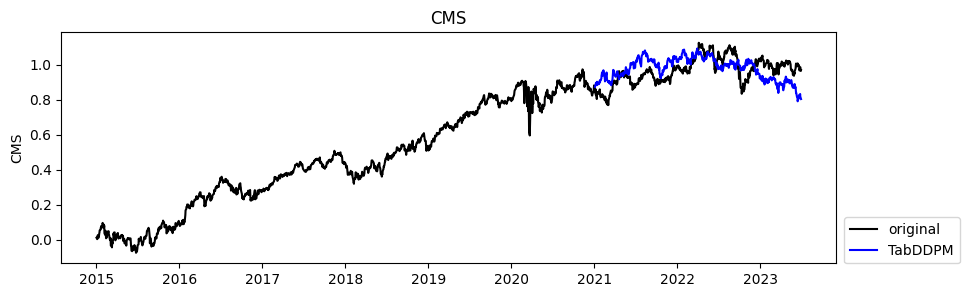

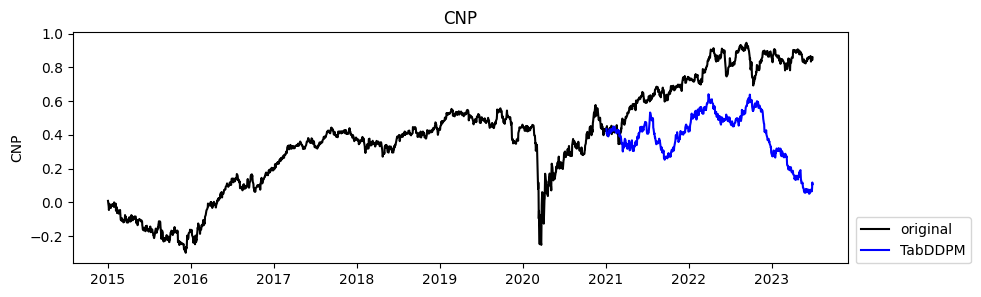

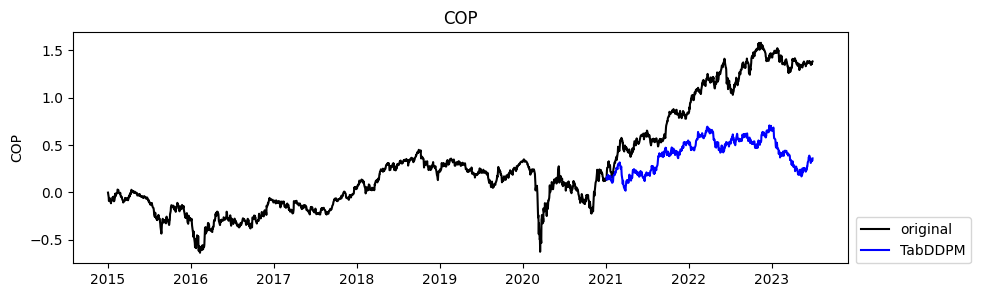

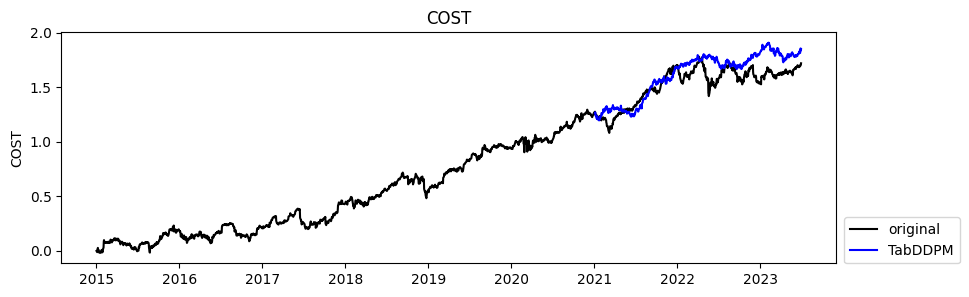

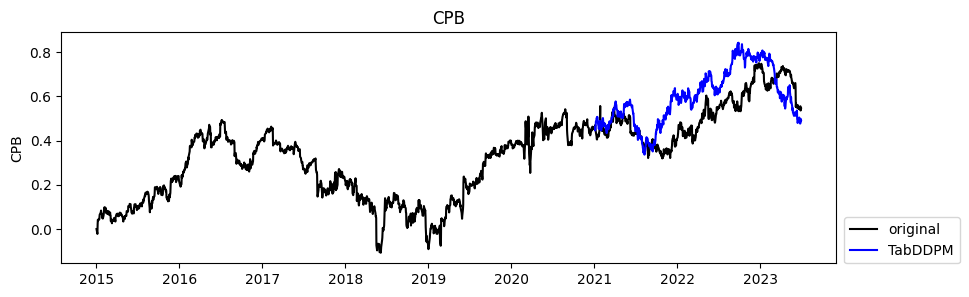

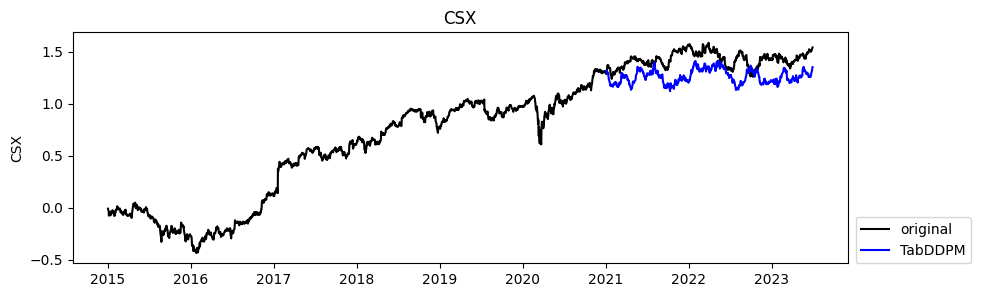

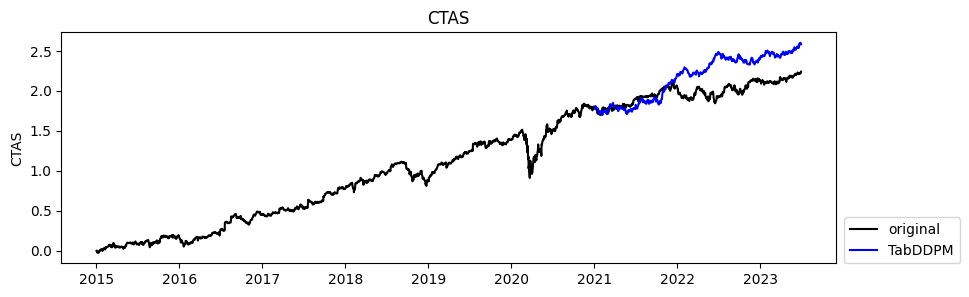

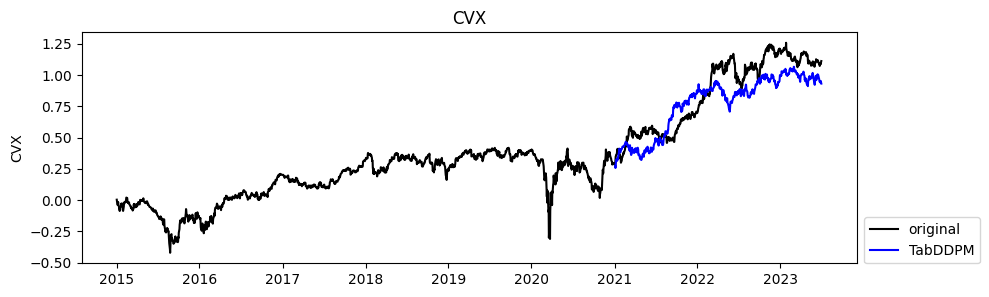

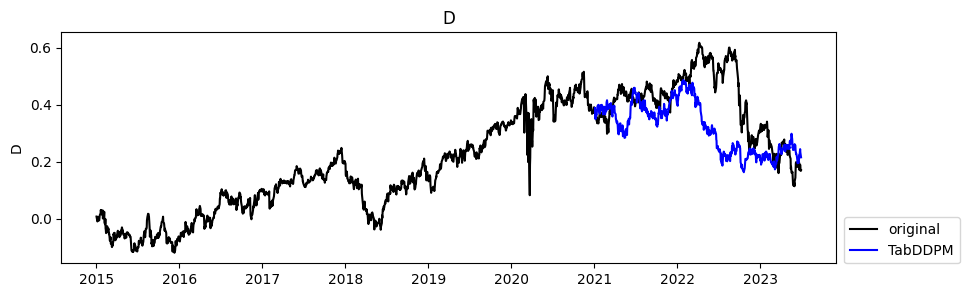

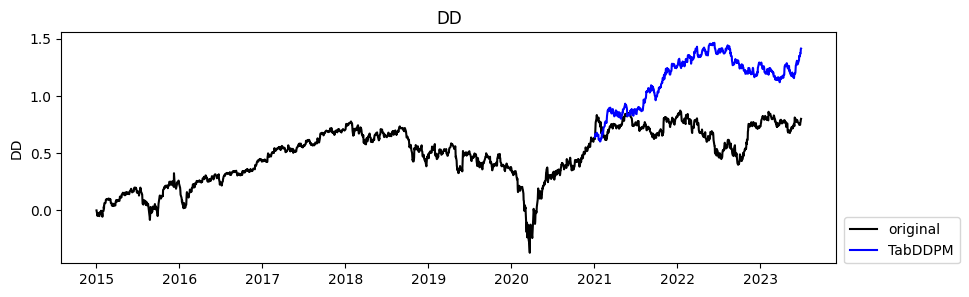

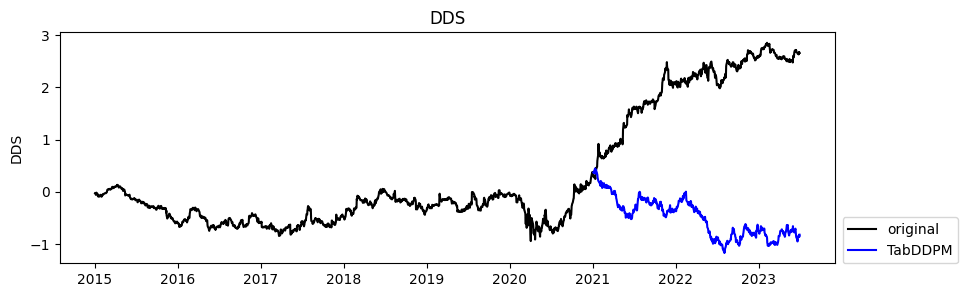

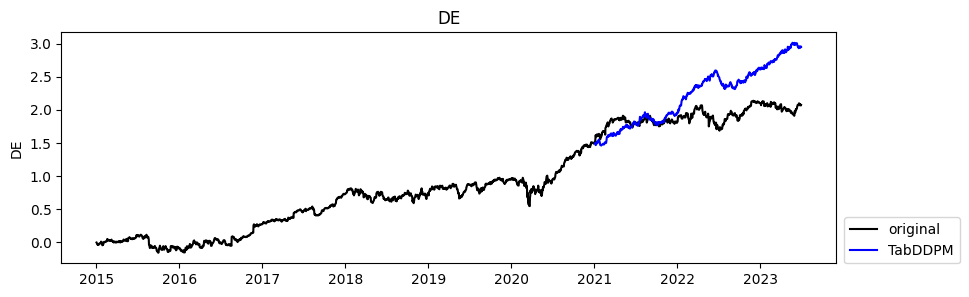

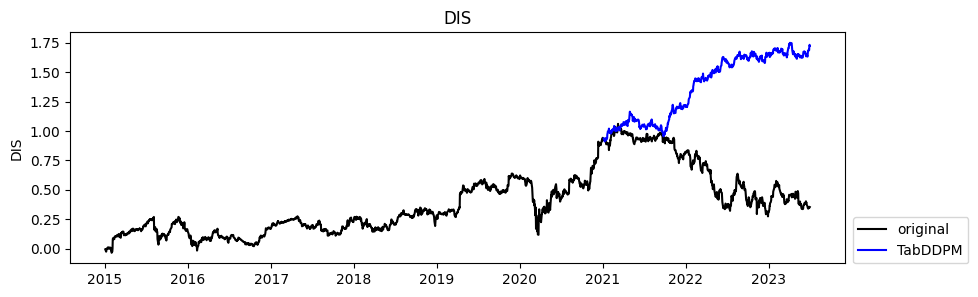

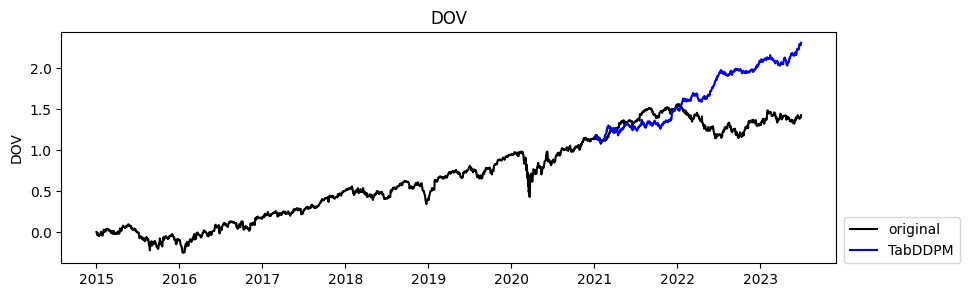

In [29]:
for col in df_imputed.columns.tolist():

    starting_point =df[col].cumsum().dropna().iloc[-1]
    values_orig = df_orig[col]
    values_imp = df_imputed[df.isna()].dropna()[col]

    values_orig = values_orig.cumsum()
    values_imp = values_imp.cumsum()+ starting_point

    fig, ax = plt.subplots(figsize=(10, 3))
    plt.plot(values_orig, color="black", label="original")

    plt.plot(values_imp, color="blue", label="TabDDPM")
    plt.ylabel(col, fontsize=10)
    plt.legend(loc=[1.01, 0], fontsize=10)
    ax.tick_params(axis="both", which="major", labelsize=10)
    plt.title(col)
    plt.show()



<Axes: xlabel='date'>

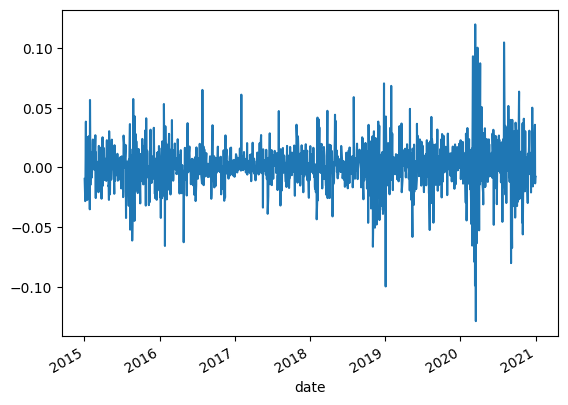

In [30]:
df['AAPL'].plot()

In [32]:
import sdv
import sdv.evaluation.single_table as sdv_st
from sdv.metadata import SingleTableMetadata

true_data = df_orig[df.isna()].dropna()
synthetic_data = df_imputed[df.isna()].dropna()

# build a metadata for evaluation (from SDV)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=true_data)
# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=true_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)


Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 1378/1378 [00:05<00:00, 255.87it/s]

Overall Score: 89.31%

Properties:
- Column Shapes: 93.44%
- Column Pair Trends: 85.19%


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
def row_fidelity(synthetic_df, true_df):
    # Assuming a simple row fidelity calculation: Mean absolute difference per row
    return np.mean(np.abs(synthetic_df - true_df), axis=1)

def column_fidelity(synthetic_df, true_df):
    # Assuming column fidelity as the comparison of mean values per column
    fidelity_scores = {}
    for col in synthetic_df.columns:
        fidelity_scores[col] = np.mean(np.abs(synthetic_df[col] - true_df[col]))
    return fidelity_scores

def kl_divergence_columns(synthetic_df, true_df, epsilon=1e-12):
    """
    Compute the KL divergence between each corresponding column of the synthetic and true dataframes.
    epsilon is used to avoid division by zero.
    """
    kl_scores = pd.DataFrame(index = synthetic_df.columns.tolist(),columns = ['KL divergence col'])
    for col in synthetic_df.columns:
        # Ensuring the data is in the form of a distribution
        synthetic_dist = np.histogram(synthetic_df[col], bins=10, density=True)[0]
        true_dist = np.histogram(true_df[col], bins=10, density=True)[0]
        
        # Adding epsilon to avoid division by zero or log of zero
        synthetic_dist += epsilon
        true_dist += epsilon
        
        kl_div = entropy(true_dist, synthetic_dist)
        kl_scores.loc[col,'KL divergence col'] = kl_div
        
    return kl_scores


def kl_divergence_rows(synthetic_df, true_df, epsilon=1e-12):
    """
    Compute the KL divergence between each corresponding column of the synthetic and true dataframes.
    epsilon is used to avoid division by zero.
    """
    kl_scores = pd.DataFrame(index = synthetic_df.index.tolist(),columns = ['KL divergence rows'])
    for date in synthetic_df.index.tolist():
        # Ensuring the data is in the form of a distribution
        synthetic_dist = np.histogram(synthetic_df.loc[date], bins=10, density=True)[0]
        true_dist = np.histogram(true_df.loc[date], bins=10, density=True)[0]
        
        # Adding epsilon to avoid division by zero or log of zero
        synthetic_dist += epsilon
        true_dist += epsilon
        
        kl_div = entropy(true_dist, synthetic_dist)
        kl_scores.loc[date,'KL divergence rows'] = kl_div
        
    return kl_scores

def wasserstein_distance_columns(synthetic_df, true_df):
    """
    Compute the Wasserstein distance between each corresponding column of the synthetic and true dataframes.
    """
    wasserstein_scores = pd.DataFrame(index = synthetic_df.columns.tolist(),columns = ['Wassertstein distance col'])
    for col in synthetic_df.columns.tolist():
        ws_dist = wasserstein_distance(synthetic_data[col],true_df[col])
        wasserstein_scores.loc[col,'Wassertstein distance col'] = ws_dist
        
    return wasserstein_scores

def wasserstein_distance_rows(synthetic_df, true_df):
    """
    Compute the Wasserstein distance between each corresponding column of the synthetic and true dataframes.
    """
    wasserstein_scores = pd.DataFrame(index = synthetic_df.index.tolist(),columns = ['Wassertstein distance rows'])
    for date in synthetic_df.index.tolist():
        ws_dist = wasserstein_distance(synthetic_data.loc[date],true_df.loc[date])
        wasserstein_scores.loc[date,'Wassertstein distance rows'] = ws_dist        
    return wasserstein_scores

kl_col = kl_divergence_columns(synthetic_data,true_data)
kl_rows = kl_divergence_rows(synthetic_data,true_data)
wasserstein_col = wasserstein_distance_columns(synthetic_data,true_data)
wasserstein_rows = wasserstein_distance_rows(synthetic_data,true_data)


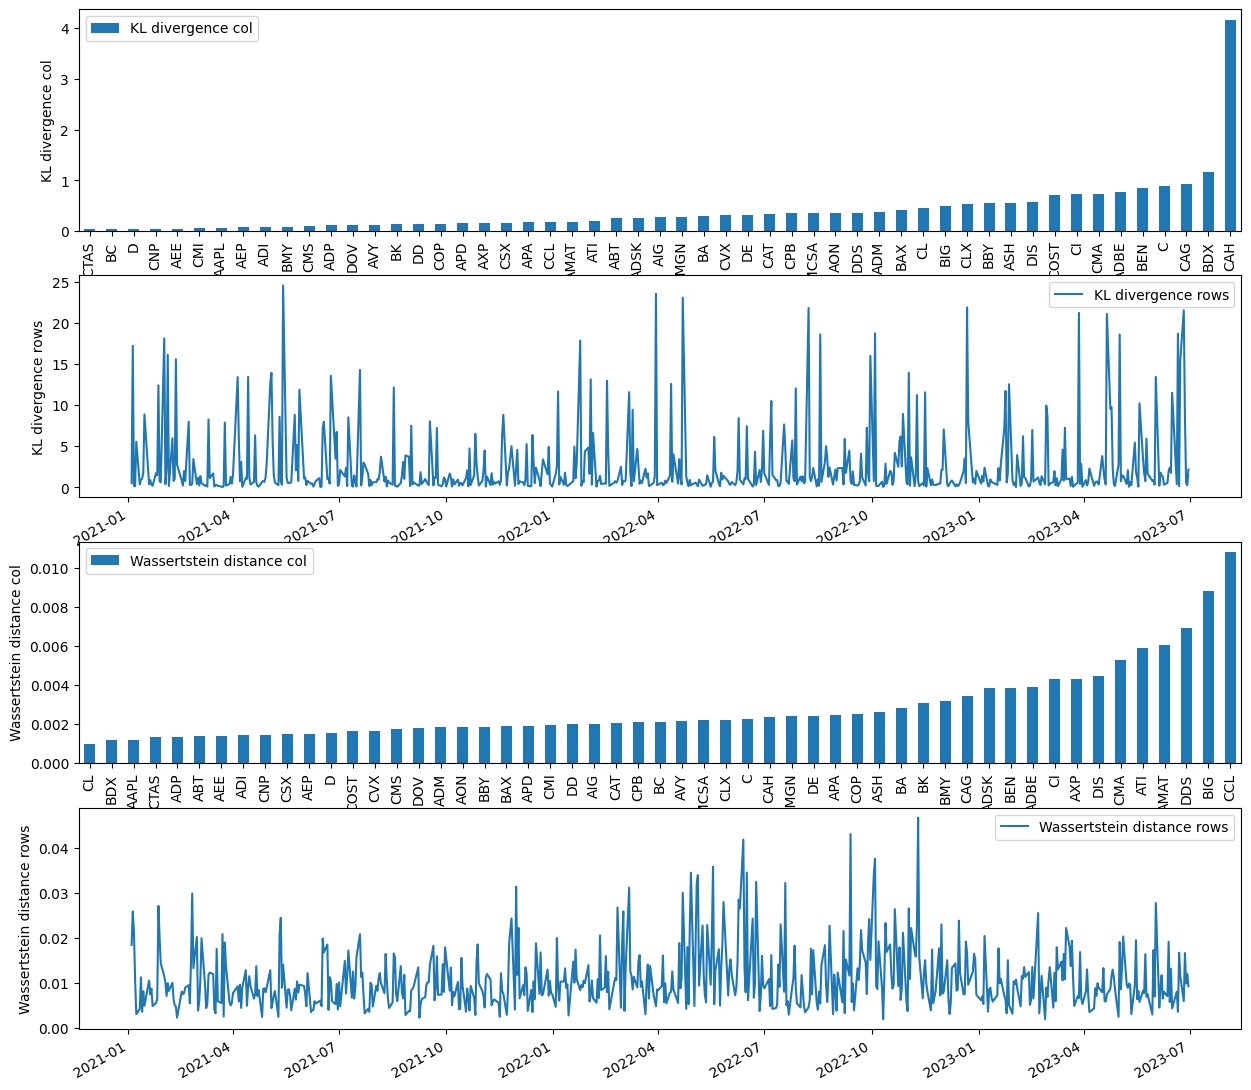

In [34]:

fig,axes = plt.subplots(nrows=4,ncols = 1,figsize = (15,15))
metrics = [kl_col,kl_rows,wasserstein_col, wasserstein_rows]
for i,ax in enumerate(axes):
    to_plot = metrics[i]
    title = to_plot.columns.tolist()[0]
    to_plot = to_plot.sort_values(by = title)
    if 'rows' in title:
        to_plot.plot(ax = axes[i],kind ='line')
    else :
        to_plot.plot(ax = axes[i],kind ='bar')
    axes[i].set_ylabel(title)


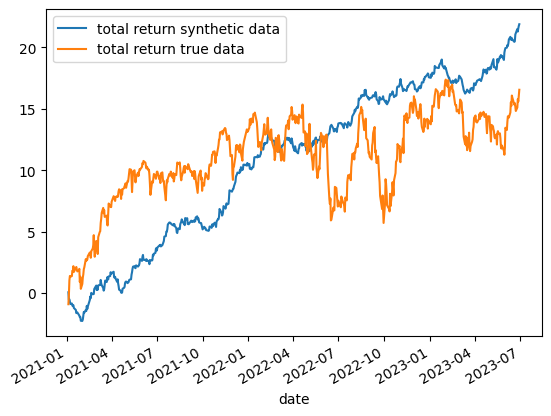

In [35]:
synthetic_data.cumsum().sum(1).plot(label = 'total return synthetic data')
true_data.cumsum().sum(1).plot(label = 'total return true data')
plt.legend()

Frobenius Norm: 0.007920253432012301
Spectral Norm: 0.007647791085615254
Condition Number - True Data: 572.0556887868329
Condition Number - Synthetic Data: 37.99872422894493


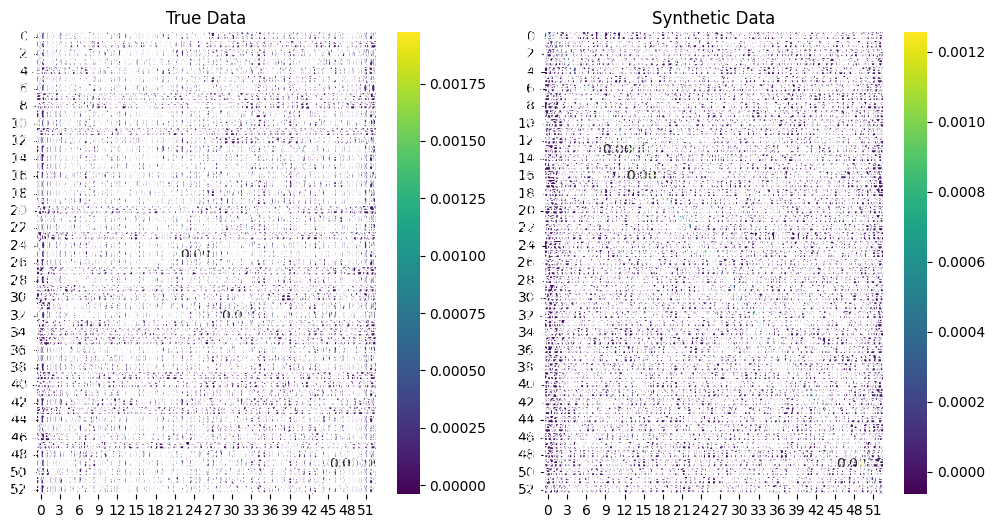

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_frobenius_norm(matrix1, matrix2):
    return np.linalg.norm(matrix1 - matrix2, 'fro')

def compute_spectral_norm(matrix1, matrix2):
    return np.linalg.norm(matrix1 - matrix2, 2)

def compute_condition_number(matrix):
    return np.linalg.cond(matrix)

def plot_covariance_matrices(cov_matrix_true, cov_matrix_synthetic, titles=['True Data', 'Synthetic Data']):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.heatmap(cov_matrix_true, ax=axs[0], cmap='viridis', annot=True)
    axs[0].set_title(titles[0])

    sns.heatmap(cov_matrix_synthetic, ax=axs[1], cmap='viridis', annot=True)
    axs[1].set_title(titles[1])

    plt.show()

cov_matrix_true = np.cov(true_data, rowvar=False)
cov_matrix_synthetic = np.cov(synthetic_data, rowvar=False)


# Calculate metrics
frobenius_norm = compute_frobenius_norm(cov_matrix_true, cov_matrix_synthetic)
spectral_norm = compute_spectral_norm(cov_matrix_true, cov_matrix_synthetic)
condition_number_true = compute_condition_number(cov_matrix_true)
condition_number_synthetic = compute_condition_number(cov_matrix_synthetic)

# Print metrics
print(f"Frobenius Norm: {frobenius_norm}")
print(f"Spectral Norm: {spectral_norm}")
print(f"Condition Number - True Data: {condition_number_true}")
print(f"Condition Number - Synthetic Data: {condition_number_synthetic}")

# Plot covariance matrices
plot_covariance_matrices(cov_matrix_true, cov_matrix_synthetic)


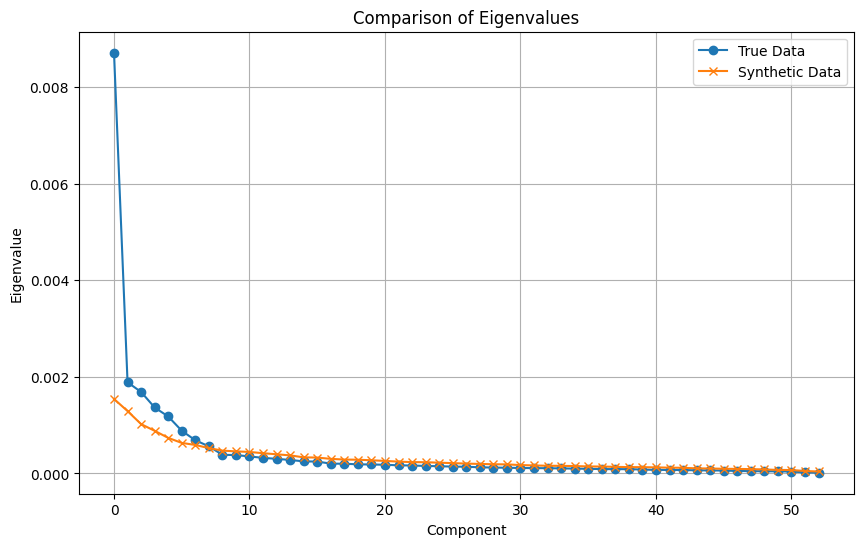

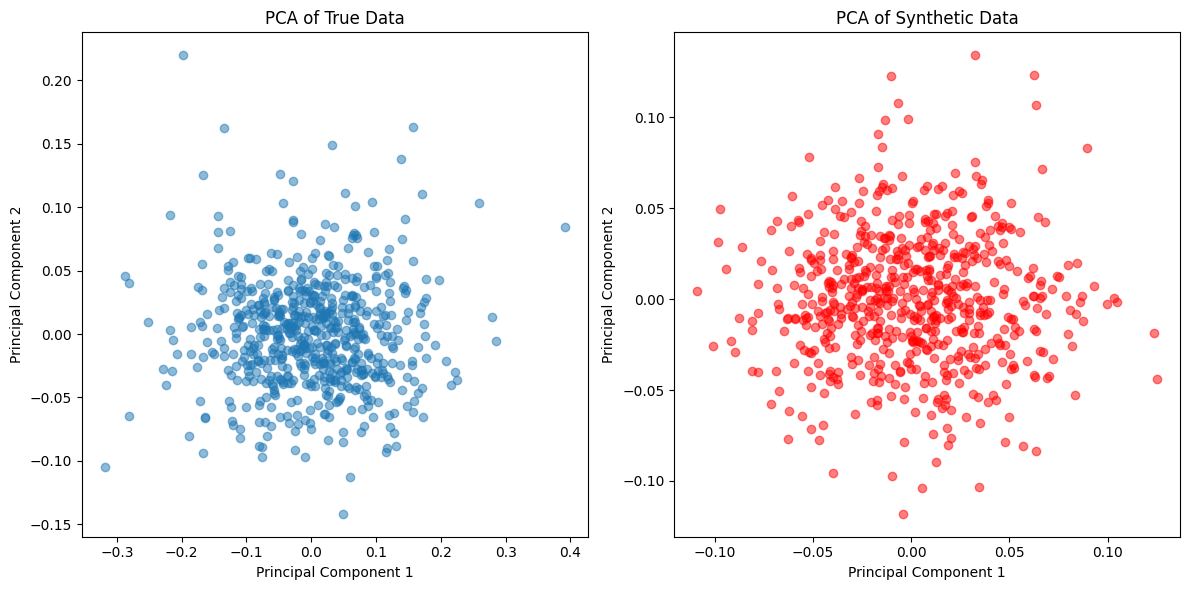

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def eigen_decomposition(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # Sort the eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]   
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]
    return eigenvalues, eigenvectors

def plot_eigenvalues(eigenvalues_true, eigenvalues_synthetic):
    plt.figure(figsize=(10, 6))
    plt.plot(eigenvalues_true, label='True Data', marker='o')
    plt.plot(eigenvalues_synthetic, label='Synthetic Data', marker='x')
    plt.ylabel('Eigenvalue')
    plt.xlabel('Component')
    plt.title('Comparison of Eigenvalues')
    plt.legend()
    plt.grid(True)
    plt.show()

def pca_visualization(data_true, data_synthetic, n_components=2):
    from sklearn.decomposition import PCA
    pca_true = PCA(n_components=n_components).fit_transform(data_true)
    pca_synthetic = PCA(n_components=n_components).fit_transform(data_synthetic)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(pca_true[:, 0], pca_true[:, 1], alpha=0.5, label='True Data')
    plt.title('PCA of True Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.subplot(1, 2, 2)
    plt.scatter(pca_synthetic[:, 0], pca_synthetic[:, 1], alpha=0.5, label='Synthetic Data', color='r')
    plt.title('PCA of Synthetic Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.tight_layout()
    plt.show()


# Eigenvalue decomposition
eigenvalues_true, eigenvectors_true = eigen_decomposition(cov_matrix_true)
eigenvalues_synthetic, eigenvectors_synthetic = eigen_decomposition(cov_matrix_synthetic)

# Plot eigenvalues
plot_eigenvalues(eigenvalues_true, eigenvalues_synthetic)

# PCA visualization (assuming the original data matrices are stored in `true_data` and `synthetic_data`)
pca_visualization(true_data, synthetic_data)


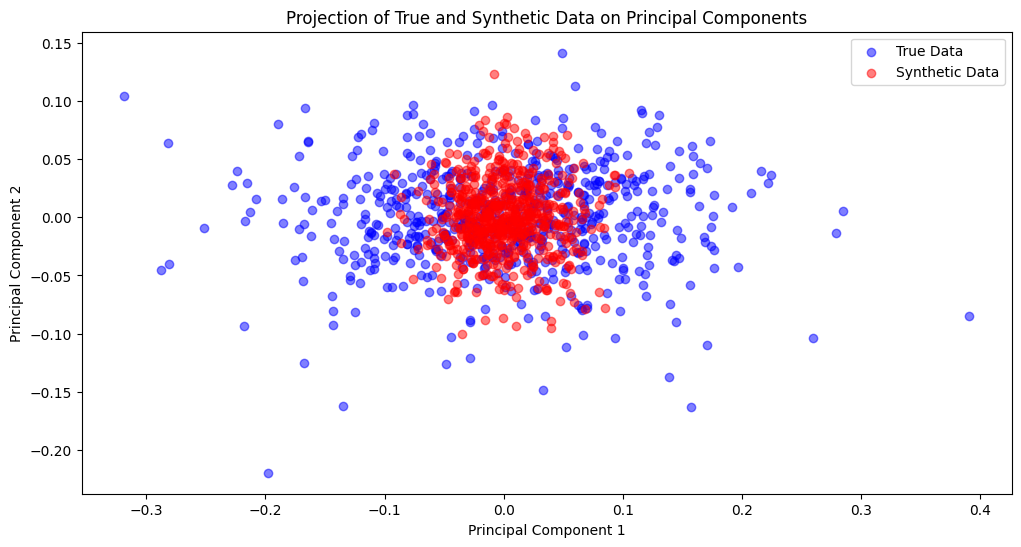

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def compute_principal_components(data):
    # Center the data
    data_meaned = data - np.mean(data, axis=0)
    # Compute covariance matrix
    covariance_matrix = np.cov(data_meaned, rowvar=False)
    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    return eigenvalues, eigenvectors

def project_onto_principal_components(data, eigenvectors):
    # Center the data
    data_meaned = data - np.mean(data, axis=0)
    # Project data
    return np.dot(data_meaned, eigenvectors)

def plot_projection_on_principal_components(projection_true, projection_synthetic):
    plt.figure(figsize=(12, 6))
    
    # Assuming we're interested in the first two principal components for visualization
    plt.scatter(projection_true[:, 0], projection_true[:, 1], alpha=0.5, label='True Data', color='blue')
    plt.scatter(projection_synthetic[:, 0], projection_synthetic[:, 1], alpha=0.5, label='Synthetic Data', color='red')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.title('Projection of True and Synthetic Data on Principal Components')
    plt.show()


# Compute principal components from true data
_, eigenvectors_true = compute_principal_components(true_data)

# Project both true and synthetic data onto these principal components
projection_true = project_onto_principal_components(true_data, eigenvectors_true)
projection_synthetic = project_onto_principal_components(synthetic_data, eigenvectors_true)

# Visualize the projections
plot_projection_on_principal_components(projection_true, projection_synthetic)


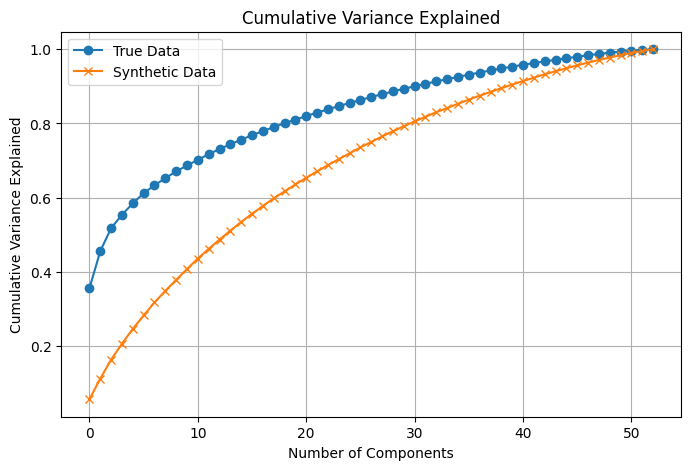

In [39]:
def plot_cumulative_variance(eigenvalues_true, eigenvalues_synthetic, title='Cumulative Variance Explained'):
    # Compute cumulative variance explained
    cumulative_variance_true = np.cumsum(eigenvalues_true) / np.sum(eigenvalues_true)
    cumulative_variance_synthetic = np.cumsum(eigenvalues_synthetic) / np.sum(eigenvalues_synthetic)

    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_variance_true, label='True Data', marker='o')
    plt.plot(cumulative_variance_synthetic, label='Synthetic Data', marker='x')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


def biplot(score, loadings, labels=None, title="Biplot", points_label=None, axis_labels=('PC1', 'PC2')):
    plt.figure(figsize=(10, 7))
    xs = score[:,0]
    ys = score[:,1]
    n = loadings.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray') # Plot points
    if points_label is not None:
        for i, txt in enumerate(points_label):
            plt.annotate(txt, (xs[i] * scalex, ys[i] * scaley), textcoords="offset points", xytext=(0,10), ha='center')
    for i in range(n):
        # Plot arrows
        plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(loadings[i,0]* 1.15, loadings[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel(axis_labels[0])
    plt.ylabel(axis_labels[1])
    plt.title(title)
    plt.grid(True)
    plt.show()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming `true_data` and `synthetic_data` are your datasets
# Standardize the data
scaler = StandardScaler()
true_data_scaled = scaler.fit_transform(true_data)
synthetic_data_scaled = scaler.transform(synthetic_data)  # Use the same scaler

# Perform PCA
pca_true = PCA()
pca_synthetic = PCA()
true_scores = pca_true.fit_transform(true_data_scaled)
synthetic_scores = pca_synthetic.fit_transform(synthetic_data_scaled)

# Eigenvalues (explained variance)
eigenvalues_true = pca_true.explained_variance_
eigenvalues_synthetic = pca_synthetic.explained_variance_

plot_cumulative_variance(eigenvalues_true, eigenvalues_synthetic)
